## Data Exploration Notebook

This notebook is meant to handily explore the data and select the required subset for training.

In [5]:
# load libraries

import json
import nibabel as nib
import matplotlib.pyplot as plt
import numpy as np
import ipywidgets as widgets
from IPython.display import display
import os
import csv
import shutil

In [6]:
# this cell aims at extracting the list of path relevant for the first model test which takes T1w T2w adn DWI as input

base_dir="data//data-multi-subject//"

desired_extension = ".json"


# Define the output CSV file paths
t1w_output_file = "t1w_file_paths.csv"
t2w_output_file = "t2w_file_paths.csv"
dwi_output_file = "dwi_file_paths.csv"

# Initialize lists to store the relative paths for T1w, T2w, and DWI files
t1w_file_paths = []
t2w_file_paths = []
dwi_file_paths = []

print("Searching for T1w, T2w, and DWI files in", base_dir, "...")

# Traverse the directory structure
for root, dirs, files in os.walk(base_dir):
    # Exclude the "derivatives" subfolder
    if "derivatives" in dirs:
        dirs.remove("derivatives")
    for file in files:
        # Check if the file name contains the desired names
        if "T1w" in file and file.endswith(desired_extension):
            # Get the relative path of the T1w file
            relative_path = os.path.relpath(os.path.join(root, file), base_dir)
            # Remove the file extension
            relative_path = os.path.splitext(relative_path)[0]
            # Append the relative path to the T1w file paths list
            t1w_file_paths.append(relative_path)
        elif "T2w" in file and file.endswith(desired_extension):
            # Get the relative path of the T2w file
            relative_path = os.path.relpath(os.path.join(root, file), base_dir)
            # Remove the file extension
            relative_path = os.path.splitext(relative_path)[0]
            # Append the relative path to the T2w file paths list
            t2w_file_paths.append(relative_path)
        elif "dwi" in file and file.endswith(desired_extension):
            # Get the relative path of the DWI file
            relative_path = os.path.relpath(os.path.join(root, file), base_dir)
            # Remove the file extension
            relative_path = os.path.splitext(relative_path)[0]
            # Append the relative path to the DWI file paths list
            dwi_file_paths.append(relative_path)

# Write the T1w file paths to the T1w CSV file
with open(t1w_output_file, "w", newline="") as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(["Relative Path"])
    writer.writerows([[path] for path in t1w_file_paths])

# Write the T2w file paths to the T2w CSV file
with open(t2w_output_file, "w", newline="") as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(["Relative Path"])
    writer.writerows([[path] for path in t2w_file_paths])

# Write the DWI file paths to the DWI CSV file
with open(dwi_output_file, "w", newline="") as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(["Relative Path"])
    writer.writerows([[path] for path in dwi_file_paths])

print("T1w file paths have been written to", t1w_output_file)
print("T2w file paths have been written to", t2w_output_file)
print("DWI file paths have been written to", dwi_output_file)


Searching for T1w, T2w, and DWI files in data//data-multi-subject// ...
T1w file paths have been written to t1w_file_paths.csv
T2w file paths have been written to t2w_file_paths.csv
DWI file paths have been written to dwi_file_paths.csv


In [7]:
# load t1w_file_paths.csv
t1w_file_paths = []
with open(t1w_output_file, "r") as csvfile:
    csvreader = csv.reader(csvfile)
    header = next(csvreader)
    for row in csvreader:
        t1w_file_paths.append(row[0])


# load  a random file from t1w_file_paths.csv
base_image_path = "data\\data-multi-subject\\" + t1w_file_paths[220]

print("Base path:", base_image_path)

# Define the paths for the JSON and NIfTI images files
json_file_path = base_image_path + ".json"
nii_file_path = base_image_path + ".nii.gz"

with open(json_file_path, "r") as json_file:
    metadata = json.load(json_file)

image_data = nib.load(nii_file_path).get_fdata()

print("Image shape:", image_data.shape)


Base path: data\data-multi-subject\sub-tokyoSkyra06\anat\sub-tokyoSkyra06_T1w
Image shape: (192, 260, 320)


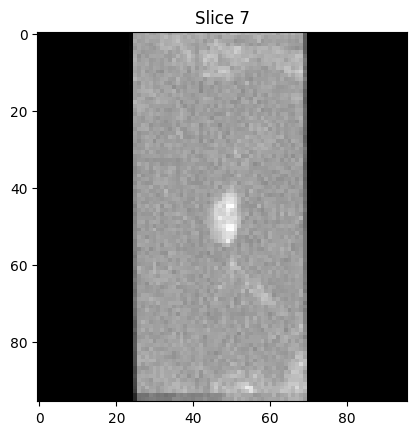

In [70]:
# Choose a slice index to visualize (0-based indexing)
slice_index = image_data.shape[2] // 2

# Extract the slice from the 3D image data
if image_data.ndim == 3:
    slice_data = image_data[:, :, slice_index]

elif image_data.ndim == 4:
    
    # average on the third dimension before slicing
    slice_data = np.mean(image_data, axis=2)
    slice_data = slice_data[:, :, slice_index]

# Normalize the intensity values for better visualization
min_intensity = np.percentile(slice_data, 1)
max_intensity = np.percentile(slice_data, 99)
normalized_slice_data = (slice_data - min_intensity) / (max_intensity - min_intensity)

# Display the slice using matplotlib
plt.imshow(normalized_slice_data, cmap="gray")
plt.title(f"Slice {slice_index}")
plt.show()

In [17]:

# Create three slider widgets for controlling the slice index of each view
sagittal_slider = widgets.IntSlider(min=0, max=image_data.shape[0]-1, value=slice_index, description='Sagittal Slice')
rear_slider = widgets.IntSlider(min=0, max=image_data.shape[1]-1, value=slice_index, description='rear Slice')
axial_slider = widgets.IntSlider(min=0, max=image_data.shape[2]-1, value=slice_index, description='axial Slice')

# Create three functions to update the displayed image based on the slice index of each view
def update_sagittal(slice_index):
    # Extract the sagittal slice from the 3D image data
    sagittal_slice = image_data[slice_index, :, :]
    
    # Normalize the intensity values for better visualization
    min_intensity = np.percentile(image_data, 1)
    max_intensity = np.percentile(image_data, 99)
    normalized_sagittal_slice = (sagittal_slice - min_intensity) / (max_intensity - min_intensity)
    
    # Display the sagittal slice using matplotlib
    plt.subplot(1, 2, 1)
    plt.imshow(normalized_sagittal_slice, cmap="gray")
    plt.title(f"Sagittal View - Slice {slice_index}")
    
    
    plt.show()

def update_rear(slice_index):
    # Extract the rear slice from the 3D image data
    rear_slice = image_data[:, slice_index, :]
    
    
    # Normalize the intensity values for better visualization
    min_intensity = np.percentile(image_data, 1)
    max_intensity = np.percentile(image_data, 99)
    normalized_rear_slice = (rear_slice - min_intensity) / (max_intensity - min_intensity)
    
    # Display the rear slice using matplotlib
    plt.subplot(1, 2, 1)
    plt.imshow(normalized_rear_slice, cmap="gray")
    plt.title(f"Rear View - Slice {slice_index}")
    
    plt.show()

def update_axial(slice_index):
    # Extract the axial slice from the 3D image data
    axial_slice = image_data[:, :, slice_index]
    
    
    # Normalize the intensity values for better visualization
    min_intensity = np.percentile(image_data, 1)
    max_intensity = np.percentile(image_data, 99)
    normalized_axial_slice = (axial_slice - min_intensity) / (max_intensity - min_intensity)
    
    # Display the axial slice using matplotlib
    plt.subplot(1, 2, 1)
    plt.imshow(normalized_axial_slice, cmap="gray")
    plt.title(f"Axial View - Slice {slice_index}")
    
    
    plt.show()

# Register the update functions as the callbacks for the sliders
widgets.interact(update_sagittal, slice_index=sagittal_slider)
widgets.interact(update_rear, slice_index=rear_slider)
widgets.interact(update_axial, slice_index=axial_slider)

# Display the sliders
display(sagittal_slider)
display(rear_slider)
display(axial_slider)



interactive(children=(IntSlider(value=48, description='Sagittal Slice', max=95), Output()), _dom_classes=('wid…

interactive(children=(IntSlider(value=48, description='rear Slice', max=95), Output()), _dom_classes=('widget-…

interactive(children=(IntSlider(value=14, description='axial Slice', max=14), Output()), _dom_classes=('widget…

IntSlider(value=48, description='Sagittal Slice', max=95)

IntSlider(value=48, description='rear Slice', max=95)

IntSlider(value=14, description='axial Slice', max=14)

In [ ]:
from monai.transforms import (
    Compose,
    LoadImage,
    RandScaleCrop,
    ToTensor,
    SliceSelect,
)

In [27]:
# testing monai transforms

# Define the transform pipeline
transforms_1 = Compose(
    [
        LoadImage(image_only=True),
        # only keep a single 2d slice
        
        RandScaleCrop(
            [0.1, 0.2, 0.3],
        ),
        ToTensor(),  # convert the image to a PyTorch tensor
    ]
)

transformes_2 = Compose(
    [
        LoadImage(image_only=True),
        ToTensor(),  # convert the image to a PyTorch tensor
    ]
)

# Load an image and apply the transforms
image = transforms_1(nii_file_path)
image_2 = transformes_2(nii_file_path)

# Check the shape of the transformed image
print(image.shape)  
print(image_2.shape)
# display the transformed image
plt.imshow(image[0], cmap="gray")

# display the initial image
#plt.imshow(image_2[0], cmap="gray")


RuntimeError: applying transform <monai.transforms.croppad.array.RandScaleCrop object at 0x0000020581AC2BF0>